# Explanatory Data Analysis(EDA):
Three important steps to keep in mind are:

1- Understand the data 

2- Clean the data

3- Find a relationship between data


In [340]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [341]:
dat=pd.read_csv('FAOSTAT_data.csv')
dat.head()

,Domain Code,Domain,Area Code (FAO),Area,Indicator Code,Indicator,Sex Code,Sex,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,OE,Employment Indicators,79,Germany,21085,Agriculture value added per worker (constant 2...,10,Total,1983,1983,3023,Labour force survey,US$,18769.525391,X,International reliable sources,NaN
1,OE,Employment Indicators,79,Germany,21085,Agriculture value added per worker (constant 2...,10,Total,1984,1984,3023,Labour force survey,US$,21448.009766,X,International reliable sources,NaN
2,OE,Employment Indicators,79,Germany,21085,Agriculture value added per worker (constant 2...,10,Total,1985,1985,3023,Labour force survey,US$,20529.093750,X,International reliable sources,NaN
3,OE,Employment Indicators,79,Germany,21085,Agriculture value added per worker (constant 2...,10,Total,1986,1986,3023,Labour force survey,US$,23113.072266,X,International reliable sources,NaN
4,OE,Employment Indicators,79,Germany,21085,Agriculture value added per worker (constant 2...,10,Total,1987,1987,3023,Labour force survey,US$,22667.585938,X,International reliable sources,NaN


## Step1: Analysing the Data

In [342]:
df=dat
df.info() #This function also shows types of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4544 entries, 0 to 4543
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       4544 non-null   object 
 1   Domain            4544 non-null   object 
 2   Area Code (FAO)   4544 non-null   int64  
 3   Area              4544 non-null   object 
 4   Indicator Code    4544 non-null   int64  
 5   Indicator         4544 non-null   object 
 6   Sex Code          4544 non-null   int64  
 7   Sex               4544 non-null   object 
 8   Year Code         4544 non-null   int64  
 9   Year              4544 non-null   int64  
 10  Source Code       4544 non-null   int64  
 11  Source            4544 non-null   object 
 12  Unit              4544 non-null   object 
 13  Value             4544 non-null   float64
 14  Flag              4544 non-null   object 
 15  Flag Description  4544 non-null   object 
 16  Note              4211 non-null   object 


In [343]:
df.describe()

,Area Code (FAO),Indicator Code,Sex Code,Year Code,Year,Source Code,Value
count,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000
mean,106.897007,21113.225132,21.908231,2006.341329,2006.341329,3024.531690,2171.798793
std,40.264828,26.451783,8.318616,9.074005,9.074005,5.319206,5554.464460
min,79.000000,21066.000000,10.000000,1973.000000,1973.000000,3023.000000,0.000000
25%,79.000000,21094.000000,13.000000,2000.000000,2000.000000,3023.000000,36.201971
50%,79.000000,21109.000000,23.000000,2008.000000,2008.000000,3023.000000,75.265000
75%,165.000000,21135.000000,31.000000,2014.000000,2014.000000,3023.000000,793.753750
max,165.000000,21158.000000,33.000000,2020.000000,2020.000000,3043.000000,46802.988281


In [344]:
#1st step is to check no. of rows and columns
df.shape


(4544, 17)

In [345]:
df.head() #To check first 5 values

,Domain Code,Domain,Area Code (FAO),Area,Indicator Code,Indicator,Sex Code,Sex,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,OE,Employment Indicators,79,Germany,21085,Agriculture value added per worker (constant 2...,10,Total,1983,1983,3023,Labour force survey,US$,18769.525391,X,International reliable sources,NaN
1,OE,Employment Indicators,79,Germany,21085,Agriculture value added per worker (constant 2...,10,Total,1984,1984,3023,Labour force survey,US$,21448.009766,X,International reliable sources,NaN
2,OE,Employment Indicators,79,Germany,21085,Agriculture value added per worker (constant 2...,10,Total,1985,1985,3023,Labour force survey,US$,20529.093750,X,International reliable sources,NaN
3,OE,Employment Indicators,79,Germany,21085,Agriculture value added per worker (constant 2...,10,Total,1986,1986,3023,Labour force survey,US$,23113.072266,X,International reliable sources,NaN
4,OE,Employment Indicators,79,Germany,21085,Agriculture value added per worker (constant 2...,10,Total,1987,1987,3023,Labour force survey,US$,22667.585938,X,International reliable sources,NaN


In [346]:
df.tail() #To check last elements

,Domain Code,Domain,Area Code (FAO),Area,Indicator Code,Indicator,Sex Code,Sex,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
4539,OE,Employment Indicators,165,Pakistan,21117,"Labour force participation rate by age, 65+, r...",33,Female,2018,2018,3023,Labour force survey,1000 persons,10.050,X,International reliable sources,Repository: ILO-STATISTICS - Micro data proces...
4540,OE,Employment Indicators,165,Pakistan,21125,"Share of employment by status of employment, t...",33,Female,2018,2018,3023,Labour force survey,1000 persons,100.000,X,International reliable sources,Repository: ILO-STATISTICS - Micro data proces...
4541,OE,Employment Indicators,165,Pakistan,21133,"Share of employment by status of employment, e...",33,Female,2018,2018,3023,Labour force survey,1000 persons,20.500,X,International reliable sources,Repository: ILO-STATISTICS - Micro data proces...
4542,OE,Employment Indicators,165,Pakistan,21135,"Share of employment by status of employment, s...",33,Female,2018,2018,3023,Labour force survey,1000 persons,79.500,X,International reliable sources,Repository: ILO-STATISTICS - Micro data proces...
4543,OE,Employment Indicators,165,Pakistan,21144,"Employment in agriculture, forestry and fishin...",33,Female,2019,2019,3043,ILO - ILO Modelled Estimates,1000 persons,9269.959,X,International reliable sources,NaN


In [347]:
df.shape #To check the values present in specific attribute

(4544, 17)

In [348]:
df.nunique() #this function help us to analyze columns either they have continuous 
              #value or categorical.Less value (i.e. 3-5) shows categorical values

Domain Code            1
Domain                 1
Area Code (FAO)        2
Area                   2
Indicator Code        47
Indicator             47
Sex Code              10
Sex                    3
Year Code             48
Year                  48
Source Code            2
Source                 2
Unit                   4
Value               3699
Flag                   1
Flag Description       1
Note                  35
dtype: int64

In [349]:
#Above coluns gives us estimate about plotting. It means we can plot value against 
#indicator code as both have continuous values.
df.columns

#This command helps to access attribute's names, which will be further used to access single column

Index(['Domain Code', 'Domain', 'Area Code (FAO)', 'Area', 'Indicator Code',
       'Indicator', 'Sex Code', 'Sex', 'Year Code', 'Year', 'Source Code',
       'Source', 'Unit', 'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')

In [350]:
df['Note'].unique() #To check uniques values of specific columns

array([nan, 'Repository: Eurostat special tabulation',
       'Break in series Break in series: Methodology revised Repository: Eurostat special tabulation',
       'Working time arrangement coverage: Full-time and part time workers Repository: Eurostat special tabulation',
       'Break in series: Methodology revised, Repository: Eurostat special tabulation',
       'Break in series Working time arrangement coverage: Full-time and part time workers | Break in series: Methodology revised Repository: Eurostat special tabulation',
       'Break in series: Methodology revised Remarks: Data will be revised once more in May or June (for more information, refer to https://ec.europa.eu/eurostat/documents/10186/6246844/LFS-2020-Note-on-German-data.pdf), Repository: Eurostat special tabulation',
       'Break in series Working time arrangement coverage: Full-time and part time workers | Break in series: Methodology revised | Remarks: Data will be revised once more in May or June (for more infor

In [351]:
df['Note'].append(df['Unit']).append(df['Value']).unique() #To check unique values of multiple columns


array([nan, 'Repository: Eurostat special tabulation',
       'Break in series Break in series: Methodology revised Repository: Eurostat special tabulation',
       ..., 20.5, 79.5, 9269.959], dtype=object)

## 2- Cleaning & Filtering the Data

In [352]:
#Find missing values inside
df.isnull() #True means values are null and false means values are not null

,Domain Code,Domain,Area Code (FAO),Area,Indicator Code,Indicator,Sex Code,Sex,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4539,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4540,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4541,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4542,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [353]:
#If we take sum, then it would no. of null values in given colums
df.isnull().sum()

Domain Code           0
Domain                0
Area Code (FAO)       0
Area                  0
Indicator Code        0
Indicator             0
Sex Code              0
Sex                   0
Year Code             0
Year                  0
Source Code           0
Source                0
Unit                  0
Value                 0
Flag                  0
Flag Description      0
Note                333
dtype: int64

## Above column shows that only 'Note' has null values. Better approach is to drop that column which has null values in majority. It can create problems. Loss should be bearable

In [354]:
#Remove that column
df_clean=df.drop(['Note'],axis=1)

In [355]:
#Now check again the null values
df_clean.isnull().sum()

Domain Code         0
Domain              0
Area Code (FAO)     0
Area                0
Indicator Code      0
Indicator           0
Sex Code            0
Sex                 0
Year Code           0
Year                0
Source Code         0
Source              0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

In [356]:
#Sometimes you can drop rows which have null values, but u have to check that rows 
# shouldn't be half of the remaining rows. Dataset shouldn't be drastically reduced in ro
#To do that, usethe following function, it automatically delete all rows which have null values
df_clean.dropna() #It is showing overall data. To summarize it, use the below mentioned command
df_clean.dropna().shape

(4544, 16)

In [357]:
df_clean.shape #To check dimension
df_clean.isnull().sum() #Cross verify that missing values are removed.

Domain Code         0
Domain              0
Area Code (FAO)     0
Area                0
Indicator Code      0
Indicator           0
Sex Code            0
Sex                 0
Year Code           0
Year                0
Source Code         0
Source              0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

In [358]:
df_clean['Area'].value_counts() #This function shows number of values present in that specific column. As there are two areas and their count is shown

Germany     3070
Pakistan    1474
Name: Area, dtype: int64

In [359]:
df.describe()

,Area Code (FAO),Indicator Code,Sex Code,Year Code,Year,Source Code,Value
count,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000
mean,106.897007,21113.225132,21.908231,2006.341329,2006.341329,3024.531690,2171.798793
std,40.264828,26.451783,8.318616,9.074005,9.074005,5.319206,5554.464460
min,79.000000,21066.000000,10.000000,1973.000000,1973.000000,3023.000000,0.000000
25%,79.000000,21094.000000,13.000000,2000.000000,2000.000000,3023.000000,36.201971
50%,79.000000,21109.000000,23.000000,2008.000000,2008.000000,3023.000000,75.265000
75%,165.000000,21135.000000,31.000000,2014.000000,2014.000000,3023.000000,793.753750
max,165.000000,21158.000000,33.000000,2020.000000,2020.000000,3043.000000,46802.988281


In [360]:
df_clean.describe() #Now you can see the difference. Mean and standard deviation would change after cleaning the data but not valid in my case as 
#I dropped column of categorical values resulted in no/minimal effect

,Area Code (FAO),Indicator Code,Sex Code,Year Code,Year,Source Code,Value
count,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000
mean,106.897007,21113.225132,21.908231,2006.341329,2006.341329,3024.531690,2171.798793
std,40.264828,26.451783,8.318616,9.074005,9.074005,5.319206,5554.464460
min,79.000000,21066.000000,10.000000,1973.000000,1973.000000,3023.000000,0.000000
25%,79.000000,21094.000000,13.000000,2000.000000,2000.000000,3023.000000,36.201971
50%,79.000000,21109.000000,23.000000,2008.000000,2008.000000,3023.000000,75.265000
75%,165.000000,21135.000000,31.000000,2014.000000,2014.000000,3023.000000,793.753750
max,165.000000,21158.000000,33.000000,2020.000000,2020.000000,3043.000000,46802.988281


In [361]:
#These are all steps of curing the data
df_clean.columns


Index(['Domain Code', 'Domain', 'Area Code (FAO)', 'Area', 'Indicator Code',
       'Indicator', 'Sex Code', 'Sex', 'Year Code', 'Year', 'Source Code',
       'Source', 'Unit', 'Value', 'Flag', 'Flag Description'],
      dtype='object')

## Finding the Outliers

<AxesSubplot:xlabel='Sex', ylabel='Year'>

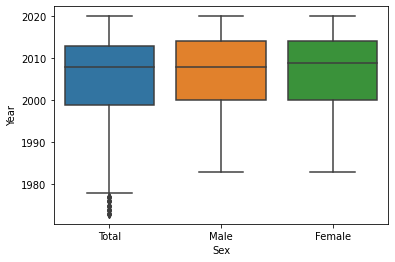

In [362]:
sns.boxplot(x='Sex',y='Year',data=df_clean) #One column should be numerical to find the range of of data. Data above box shows outliers
#This shows that sex has some issues/outliers. We will individually plot sex attribute

In [363]:
df['Sex'].describe()

count      4544
unique        3
top       Total
freq       1624
Name: Sex, dtype: object

<AxesSubplot:ylabel='Year'>

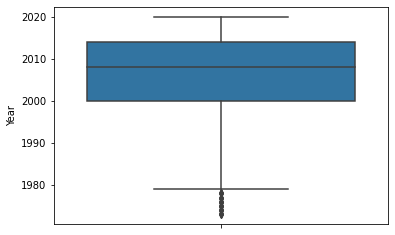

In [364]:
sns.boxplot(y='Year',data=df_clean) #We can seethat the year below 1980 has some issues. As above and bottom lines shows minmum and maximum values.
#Mid line shows median and box shows inter quartile range within region in box.

<AxesSubplot:xlabel='Year', ylabel='Density'>

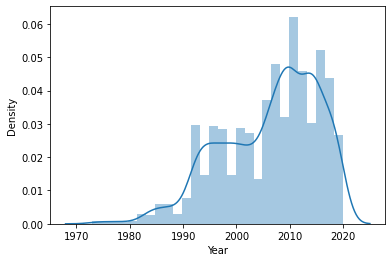

In [365]:
sns.distplot(df_clean['Year']) #this is the distance plot. Values are going away from bell curve.
#This is normality check/distanceplt/histrogram. If curve is tilted on any side, then there would be 
#dispersion and outlier removal would help. We normalize the values to make perfect curve

In [366]:
#Outlier Removal 
df_clean['Year'].mean()  #This show mean of respect attribute

2006.3413292253522

In [367]:
##df_clean['Year']=df_clean['Year'] < 1980  #To remove outliers less than 1980
df_clean['Year'].mean()

2006.3413292253522

<AxesSubplot:ylabel='Year'>

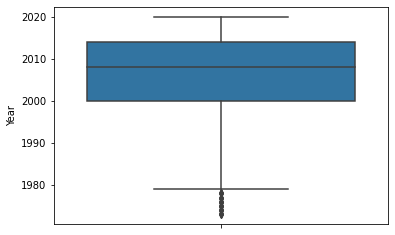

In [368]:
sns.boxplot(y='Year',data=df_clean)

In [369]:
dfclean= df_clean[df_clean.Sex != 'Total']
dfclean

,Domain Code,Domain,Area Code (FAO),Area,Indicator Code,Indicator,Sex Code,Sex,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description
1077,OE,Employment Indicators,79,Germany,21155,"Share of employment in agriculture, forestry a...",21,Male,1983,1983,3023,Labour force survey,%,4.700000,X,International reliable sources
1078,OE,Employment Indicators,79,Germany,21152,"Share of employees in agriculture, forestry an...",21,Male,1983,1983,3023,Labour force survey,%,1.362960,X,International reliable sources
1079,OE,Employment Indicators,79,Germany,21155,"Share of employment in agriculture, forestry a...",21,Male,1984,1984,3023,Labour force survey,%,4.400000,X,International reliable sources
1080,OE,Employment Indicators,79,Germany,21152,"Share of employees in agriculture, forestry an...",21,Male,1984,1984,3023,Labour force survey,%,1.293424,X,International reliable sources
1081,OE,Employment Indicators,79,Germany,21155,"Share of employment in agriculture, forestry a...",21,Male,1985,1985,3023,Labour force survey,%,4.500000,X,International reliable sources
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4539,OE,Employment Indicators,165,Pakistan,21117,"Labour force participation rate by age, 65+, r...",33,Female,2018,2018,3023,Labour force survey,1000 persons,10.050000,X,International reliable sources
4540,OE,Employment Indicators,165,Pakistan,21125,"Share of employment by status of employment, t...",33,Female,2018,2018,3023,Labour force survey,1000 persons,100.000000,X,International reliable sources
4541,OE,Employment Indicators,165,Pakistan,21133,"Share of employment by status of employment, e...",33,Female,2018,2018,3023,Labour force survey,1000 persons,20.500000,X,International reliable sources
4542,OE,Employment Indicators,165,Pakistan,21135,"Share of employment by status of employment, s...",33,Female,2018,2018,3023,Labour force survey,1000 persons,79.500000,X,International reliable sources


In [370]:
dfclean.shape  #Now the rows with unidentified grnder has been removes. It mean 4544-2920=1624 rows has removed


(2920, 16)

<AxesSubplot:ylabel='Year'>

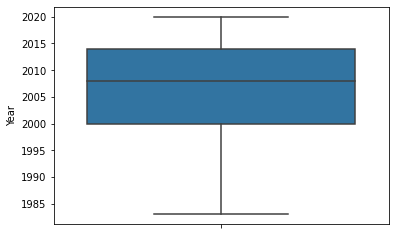

In [371]:
sns.boxplot(y='Year',data=dfclean) #Outliers has been removed

<AxesSubplot:xlabel='Sex', ylabel='Year'>

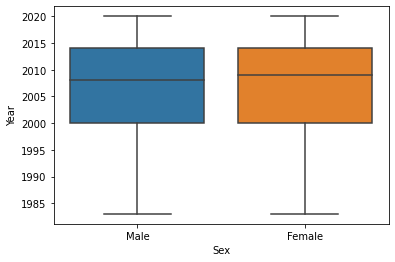

In [372]:
sns.boxplot(x='Sex',y='Year',data=dfclean) #Now you can see that data is in pure state

<AxesSubplot:xlabel='Year', ylabel='Density'>

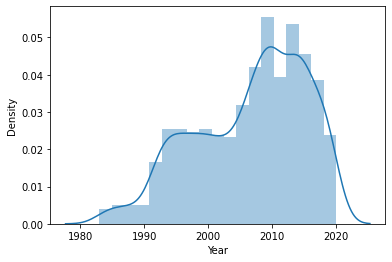

In [373]:
sns.distplot(dfclean['Year']) #The bell curve is normalized in some way

In [374]:
dfclean_update=df_clean[df_clean['Sex']!='Total'] # You can remove in this way
dfclean_update.shape

(2920, 16)

In [375]:
#dfclean['Year'].mean() In case of continuous variable, you would find mean

<AxesSubplot:>

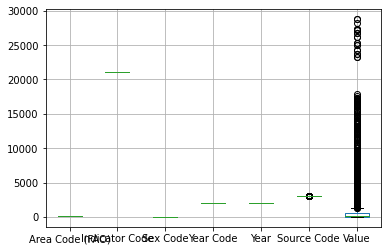

In [376]:
dfclean.boxplot() #Value above 20000 shows change, if there would be 2 3 values then it would be removed. But these will not considered as outliers. We would draw histogram

<AxesSubplot:xlabel='Value', ylabel='Density'>

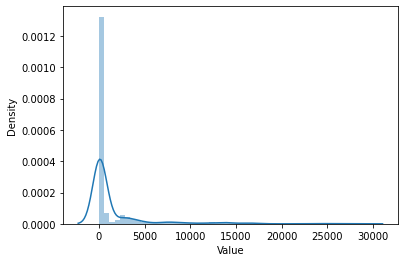

In [377]:
sns.distplot(dfclean['Value']) #This shows that data is screwed as it has a lot of dispersion, so we would use logarithm transformation. But if we would delete, then below values would come on top, so we can;t remove more data.

array([[<AxesSubplot:title={'center':'Area Code (FAO)'}>,
        <AxesSubplot:title={'center':'Indicator Code'}>,
        <AxesSubplot:title={'center':'Sex Code'}>],
       [<AxesSubplot:title={'center':'Year Code'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Source Code'}>],
       [<AxesSubplot:title={'center':'Value'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

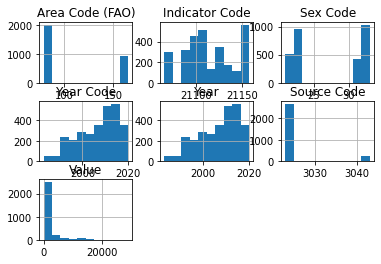

In [378]:
dfclean.hist()

<AxesSubplot:>

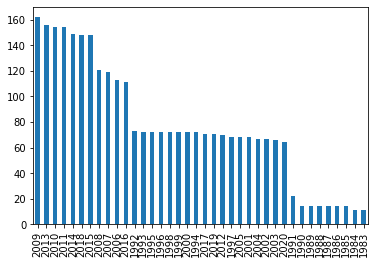

In [379]:
pd.value_counts(dfclean['Year']).plot.bar() #This shows the dataset distribution among years

<AxesSubplot:>

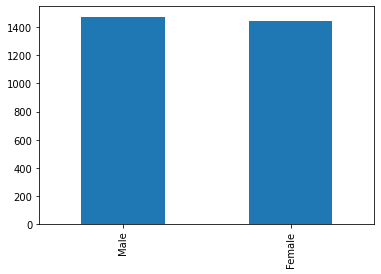

In [380]:
pd.value_counts(dfclean['Sex']).plot.bar()

In [381]:
dfclean.groupby(['Sex']).mean() #This shows the salaries given to male is high as compared to female
#Although both are almost in same number

,Area Code (FAO),Indicator Code,Sex Code,Year Code,Year,Source Code,Value
Sex,,,,,,,
Female,105.699931,21114.434511,32.354123,2006.740125,2006.740125,3024.607762,969.356874
Male,106.890318,21113.413676,22.359513,2006.570074,2006.570074,3024.570752,1966.954982


In [382]:
dfclean['Sex'].value_counts()

Male      1477
Female    1443
Name: Sex, dtype: int64

In [383]:
df.groupby(['Sex']).mean() #See the comparison between impure and pure data thats why data manipulation/Data wrangling is important

,Area Code (FAO),Indicator Code,Sex Code,Year Code,Year,Source Code,Value
Sex,,,,,,,
Female,105.699931,21114.434511,32.354123,2006.740125,2006.740125,3024.607762,969.356874
Male,106.890318,21113.413676,22.359513,2006.570074,2006.570074,3024.570752,1966.954982
Total,107.966749,21111.979064,12.216133,2005.778941,2005.778941,3024.428571,3426.526623


## Correlation\Relationship between Data

In [384]:
cor_dfclean=dfclean.corr() 
#Correlation shows relationship between data. If one value is decreasing and other is increasing,
# it means that negative correlation, otherwise positive. If coorelation is 0, then no change

<AxesSubplot:>

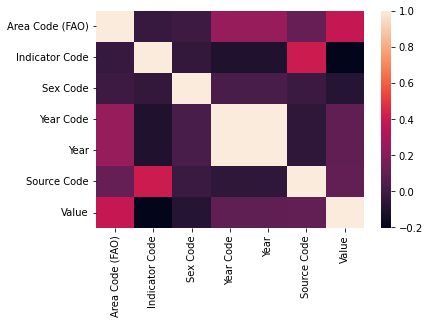

In [385]:
sns.heatmap(cor_dfclean) #0 shows no correlation

<AxesSubplot:>

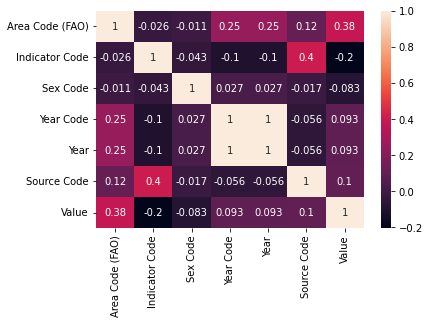

In [386]:
sns.heatmap(cor_dfclean, annot=True) #With Values

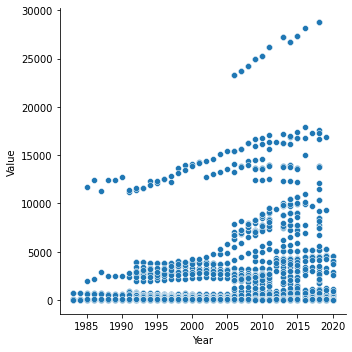

In [387]:
sns.relplot(x='Year',y='Value',data=dfclean) #This plot is showing less correlation as shown in confusion matrix

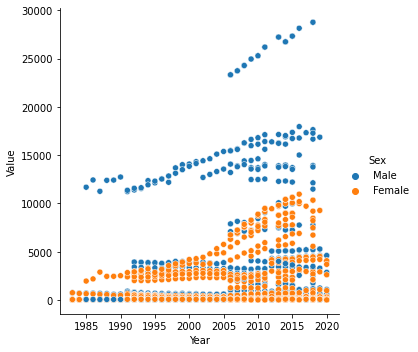

In [388]:
sns.relplot(x='Year',y='Value',hue='Sex',data=dfclean)

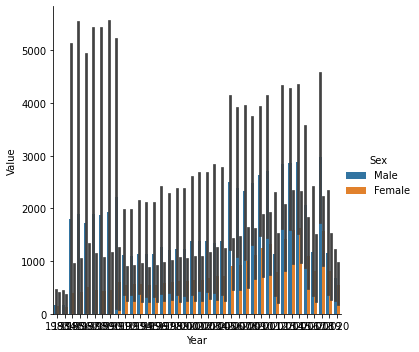

In [389]:
sns.catplot(x='Year',y='Value',hue='Sex',data=dfclean, kind='bar')

<AxesSubplot:xlabel='Sex', ylabel='Year'>

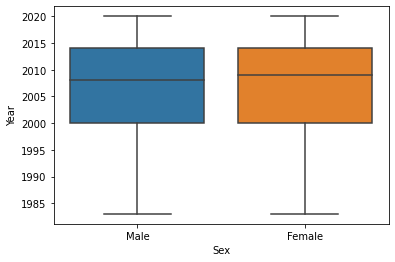

In [390]:

sns.boxplot(x='Sex',y='Year',data=dfclean) #This shows the median of male and female. You can tell mean and median and you can see higher salaries as outliers and can remove those outliers.

<AxesSubplot:xlabel='Sex', ylabel='Value'>

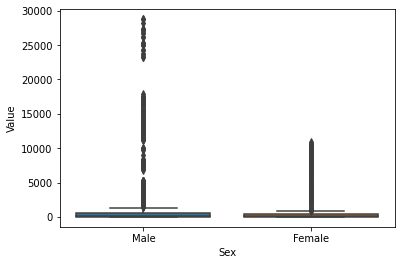

In [391]:
sns.boxplot(x='Sex',y='Value',data=dfclean)

<AxesSubplot:>

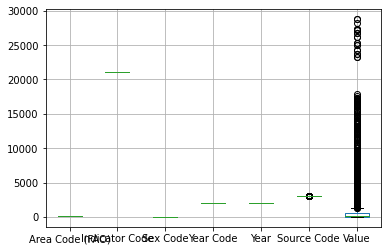

In [392]:
dfclean.boxplot()

In [393]:
dfclean_r= df_clean[df_clean.Value > 20000] #We can't delete more values as outliers because data would reduce drastically
dfclean_r.shape

(135, 16)

In [394]:
dfclean['Value_Log']=np.log(dfclean['Value'])
dfclean.head()

,Domain Code,Domain,Area Code (FAO),Area,Indicator Code,Indicator,Sex Code,Sex,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Value_Log
1077,OE,Employment Indicators,79,Germany,21155,"Share of employment in agriculture, forestry a...",21,Male,1983,1983,3023,Labour force survey,%,4.700000,X,International reliable sources,1.547563
1078,OE,Employment Indicators,79,Germany,21152,"Share of employees in agriculture, forestry an...",21,Male,1983,1983,3023,Labour force survey,%,1.362960,X,International reliable sources,0.309659
1079,OE,Employment Indicators,79,Germany,21155,"Share of employment in agriculture, forestry a...",21,Male,1984,1984,3023,Labour force survey,%,4.400000,X,International reliable sources,1.481605
1080,OE,Employment Indicators,79,Germany,21152,"Share of employees in agriculture, forestry an...",21,Male,1984,1984,3023,Labour force survey,%,1.293424,X,International reliable sources,0.257293
1081,OE,Employment Indicators,79,Germany,21155,"Share of employment in agriculture, forestry a...",21,Male,1985,1985,3023,Labour force survey,%,4.500000,X,International reliable sources,1.504077


<AxesSubplot:>

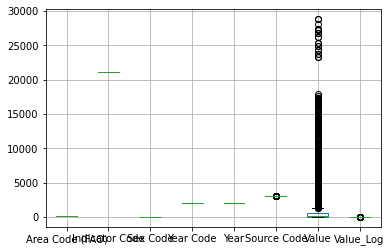

In [395]:
dfclean.boxplot() # This shows the impact of log.

<AxesSubplot:xlabel='Sex', ylabel='Value_Log'>

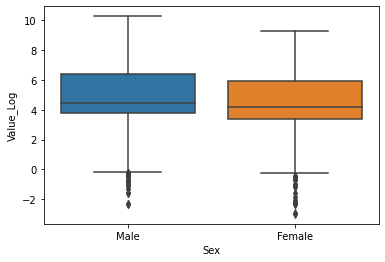

In [396]:
sns.boxplot(x='Sex',y='Value_Log',data=dfclean)

<AxesSubplot:xlabel='Sex', ylabel='Value'>

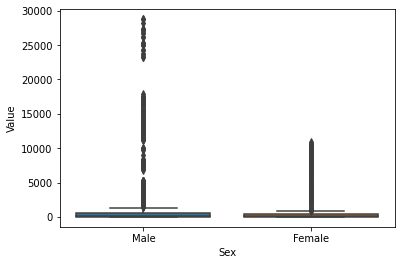

In [397]:
sns.boxplot(x='Sex',y='Value',data=dfclean)

In [398]:
(dfclean['Value_Log']<0).value_counts() #It means 79 rows contain outliers, so we can remove them 

False    2841
True       79
Name: Value_Log, dtype: int64

In [399]:
dfclean_L= dfclean[dfclean.Value_Log > 0] #Remove outliers greater than 0

<AxesSubplot:xlabel='Sex', ylabel='Value_Log'>

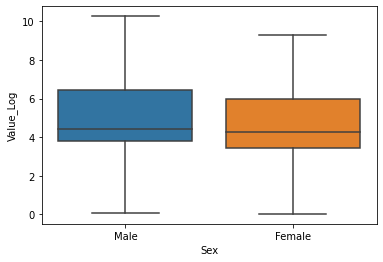

In [400]:
sns.boxplot(x='Sex',y='Value_Log',data=dfclean_L) #There are no outliers left

<AxesSubplot:xlabel='Value_Log', ylabel='Density'>

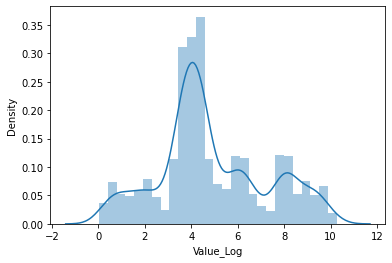

In [401]:
sns.distplot(dfclean_L['Value_Log']) #Bell curve after normalization

<AxesSubplot:>

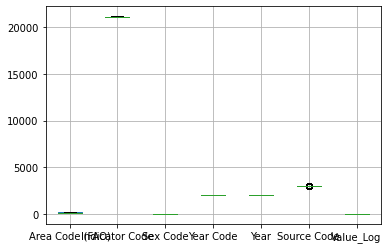

In [402]:
dfclean_LU=dfclean_L.drop(columns='Value') #Drop original values to check data
dfclean_LU.boxplot()

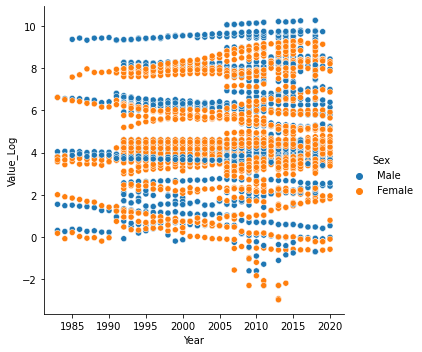

In [403]:
sns.relplot(x='Year',y='Value_Log',hue='Sex',data=dfclean)

<Figure size 1080x360 with 0 Axes>

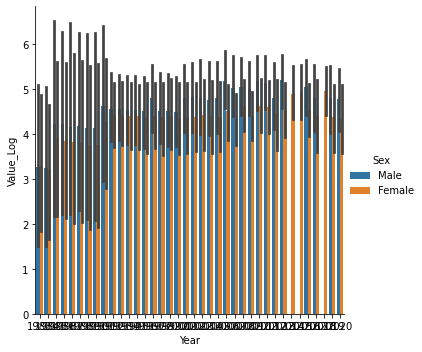

<Figure size 1080x360 with 0 Axes>

In [404]:
sns.catplot(x='Year',y='Value_Log',hue='Sex',data=dfclean, kind='bar')
plt.figure(figsize=(15,5))

<AxesSubplot:xlabel='Year', ylabel='Value_Log'>

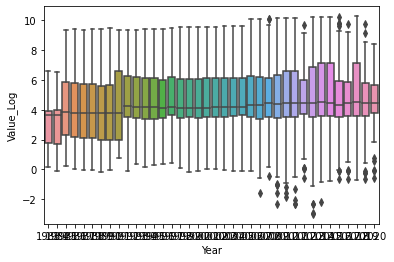

In [405]:
sns.boxplot(x='Year',y='Value_Log',data=dfclean) 


Text(0.5, 1.0, 'Relation between Food & employment')

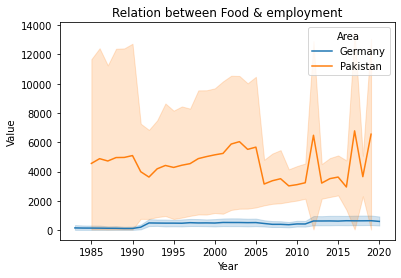

In [406]:
sns.lineplot(x='Year',y='Value',hue='Area',data=dfclean) #show the relationship between employment and population
plt.title("Relation between Food & employment")